### Package Versions

- **Python version**: `3.9.13`
- **NumPy version**: `1.23.5`
- **Matplotlib version**: `3.4.2`
- **SciPy version**: `1.9.1`
- **Pandas version**: `1.5.3`



In [11]:
# Import the necessary libraries
import numpy as np # For calculations
import matplotlib.pyplot as plt # For plotting 
from scipy.optimize import curve_fit # For curve fitting
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator) #make plot nicer
import pandas as pd # For reading the data
import os #For flexible path way to data

In [12]:
# Define the path in a more flexible way
root_folder = os.getcwd()
data_file = os.path.join(root_folder, 'pressureRatio.dat')
#Read data file using pandas package
data = pd.read_csv(data_file, delim_whitespace=True )
columns_title =data.columns
print("Column tiltes", columns_title)
data.head()

Column tiltes Index(['Num', 'Radius', 'R_e+', 'R_e-', 'E1', 'E1_e+', 'E1_e-', 'E2', 'E2_e+',
       'E2_e+.1', 'ratio', 'r_e+', 'r_e-'],
      dtype='object')


,Num,Radius,R_e+,R_e-,E1,E1_e+,E1_e-,E2,E2_e+,E2_e+.1,ratio,r_e+,r_e-
0,1,221.1,11.0,12.3,8.30,0.76,0.88,9.67,1.14,1.12,0.86,0.08,0.07
1,2,268.5,22.1,20.7,4.92,0.77,0.70,4.19,0.82,0.70,1.17,0.16,0.15
2,3,138.4,12.7,11.9,3.03,0.53,0.49,2.61,0.59,0.49,1.16,0.20,0.18
3,4,714.3,23.5,34.5,49.61,3.15,3.19,60.62,4.84,6.13,0.82,0.06,0.05
4,5,182.3,18.5,15.1,2.75,0.49,0.43,3.30,0.81,0.61,0.83,0.14,0.14


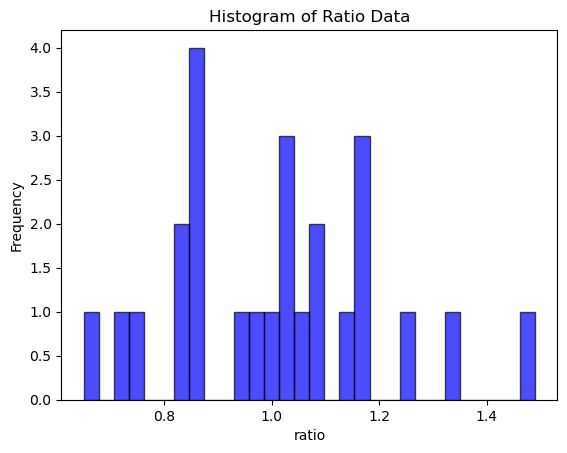

In [52]:
# Plot the histogram of the 'ratio' column
plt.hist(data['ratio'], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Adding labels and title
plt.xlabel('ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Ratio Data')

# Show the plot
plt.show()

### Section a)

For calculating the wighted average for the data set $\{x_1,\cdots,x_N\}$, such that $x_i$ has uncertainty $\sigma_i$; we require to define some wight for $x_i$ such as
$$ w_i :=\frac{1}{\sigma_i^2}, \sigma_i^2 := \frac{r_{e+}+r_{e-}}{2}$$
then according to the definition the wighted average will be 
$$ \bar{x} := \frac{\sum_{i=1}^{N}x_i\times w_i}{\sum_{i=1}^{N} w_i}.$$

In [13]:
# Function to calculate weighted average and standard deviation
def weighted_average_std(u_bound, l_bound, data):
    '''u_bound and l_bound are lists of floats given by input data set
    data is given list of float numbers that are given in each column
    output: float numbers average wighted and Standard deviation'''
    sigma2 = ((u_bound+l_bound)/2)**2 # Average the asymmetric errors
    weight = 1/sigma2
    return np.sum(data*weight)/np.sum(weight) , np.sqrt(1/np.sum(weight))
# Weighted average and standard deviation for 'ratio'
weighted_avg ,weighted_std  = weighted_average_std(data['r_e+'],data['r_e-'],data['ratio'])
# Print the result
print(f"Weighted Average of ratio: {weighted_avg :.2f} ± {weighted_std:.2f}")

Weighted Average of ratio: 0.90 ± 0.02


### Section b)
The linear averaging is the unweighted averaging. So , the Linear average of the data set will be:
$$\bar{x} := \frac{\sum_{i=1}^{N} x_i}{N}.$$

The standard deviation of the linear average is simply the square root of the sum of the squared individual uncertainties, divided by the number of data points.
$$ \sigma_{linear} := \sqrt{\frac{1}{N^2}\sum_{i=1}^N \sigma_i^2} $$


In [14]:
#linear averaging
def Linear_average(u_bound, l_bound, data):
    Linear_average = np.mean(data) # Mean of Data
    Linear_std = np.sqrt(np.mean(((u_bound+l_bound)/2)**2)) # mean of the averaged uncertainties
    return Linear_average, Linear_std

# Linear average and standard deviation for 'ratio'
linear_avg ,linear_std  = Linear_average(data['r_e+'],data['r_e-'],data['ratio'])
# Print the result round of 
print(f"Linear Average of ratio: {linear_avg :.2f} ± {linear_std:.2f}")

Linear Average of ratio: 1.01 ± 0.14


### Visualize the linear and weighted averaging for ratio

In [38]:

def Plot_linear_vs_weighted_average_median(data_name, U_bound_name, L_bound_name, unit=None):
    """
    Function to plot a histogram of the data, comparing linear and weighted averages along with their uncertainties,
    and also display the median.

    Parameters:
    - data (DataFrame): The dataset containing the data to plot.
    - data_name (str): The name of the data column to be plotted (e.g., 'ratio').
    - upper_bound (str): The name of the column for the upper bound of uncertainties (e.g., 'r_e+').
    - lower_bound (str): The name of the column for the lower bound of uncertainties (e.g., 'r_e-').
    - unit (str, optional): The unit of measurement. If not provided, units will not be shown in labels.
    """

    # Calculate the median of the data
    median = np.median(data[data_name])
    
    # Linear average and standard deviation for the given data
    linear_avg, linear_std = Linear_average(data[U_bound_name], data[L_bound_name], data[data_name])
    
    # Weighted average and standard deviation for the data
    weighted_avg, weighted_std = weighted_average_std(data[U_bound_name], data[L_bound_name], data[data_name])
    
    # Print the calculated values
    print(f'Linear Average of {data_name} ({unit}): {linear_avg :.2f} ± {linear_std:.2f}({unit})' if unit else f'Linear Average of {data_name}:  {linear_avg :.2f} ± {linear_std:.2f}')
    print(f'Weighted Average of {data_name} ({unit}): {weighted_avg :.2f} ± {weighted_std:.2f}({unit})' if unit else f'Weighted Average of {data_name}: {weighted_avg :.2f} ± {weighted_std:.2f}')
    print(f'The median of {data_name} ({unit}): {median :.2f}({unit})' if unit else f'The median of {data_name}: {median :.2f}')
    
    # Create the histogram
    plt.figure(figsize=(8, 6))
    counts, bins, _ = plt.hist(data[data_name], bins=30, color='blue', alpha=0.7, edgecolor='black', density=True)
    
    # Get x-limits of the plot
    xmin, xmax = plt.xlim()
    
    # Plot vertical line for the linear average
    plt.axvline(linear_avg, color='red', linestyle='--', linewidth=2, label=f'Linear Average: {linear_avg:.2f}({unit})' if unit else f'Linear Average: {linear_avg:.2f}')
    # Plot shaded region for linear standard deviation
    plt.fill_betweenx([0, max(counts)], linear_avg - linear_std, linear_avg + linear_std, color='red', alpha=0.2, label=f'Linear Avg Std: ±{linear_std:.2f}({unit})' if unit else f'Linear Avg Std: ±{linear_std:.2f}')
    
    # Plot vertical line for the weighted average
    plt.axvline(weighted_avg, color='green', linestyle='--', linewidth=2, label=f'Weighted Average: {weighted_avg:.2f}({unit})' if unit else f'Weighted Average: {weighted_avg:.2f}')
    # Plot shaded region for weighted standard deviation
    plt.fill_betweenx([0, max(counts)], weighted_avg - weighted_std, weighted_avg + weighted_std, color='green', alpha=0.2, label=f'Weighted Avg Std: ±{weighted_std:.2f}({unit})' if unit else f'Weighted Avg Std: ±{weighted_std:.2f}')
    
    # Plot vertical line for the median
    plt.axvline(median, color='purple', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
    
    # Set the ylabel with or without the unit
    ylabel = f"{data_name} ({unit})" if unit else f"{data_name}"
    plt.ylabel('Density')
    
    # Set the plot title
    title = f'Linear vs Weighted Average with Median for {data_name} ({unit})' if unit else f'Linear vs Weighted Average with Median for {data_name}'
    plt.title(title)
    
    # Label the x-axis
    plt.xlabel(ylabel)

    # Add a legend to describe the plot elements
    plt.legend()

    # Show the plot
    plt.show()


Linear Average of ratio (m): 1.01 ± 0.14(m)
Weighted Average of ratio (m): 0.90 ± 0.02(m)
The median of ratio (m): 1.02(m)


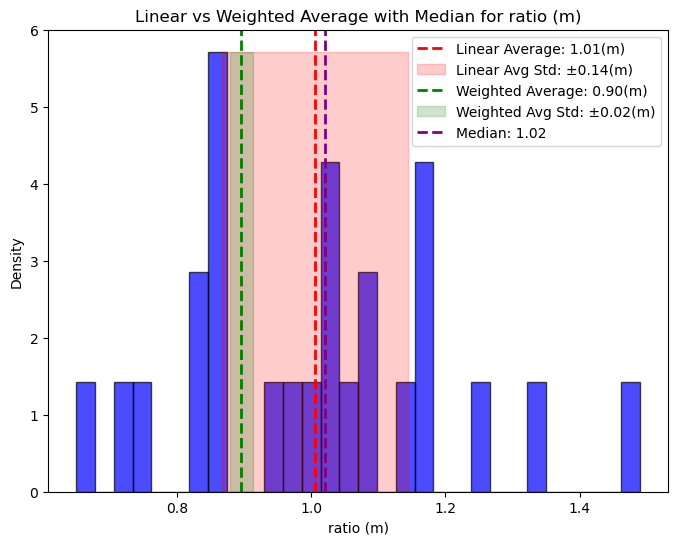

In [39]:
# Plotting the 'ratio' dataset by comparing linear and weighted averages with their uncertainties
# 'ratio': The name of the data column to be plotted
# 'r_e+': The upper bound column for the uncertainties
# 'r_e-': The lower bound column for the uncertainties
# None: The unit of measurement (optional, here it represents no unit for this example)
Plot_linear_vs_weighted_average_median('ratio', 'r_e+', 'r_e-', 'm')


The linear average is often greater than the weighted average because the linear average gives equal importance to all values, including those with large uncertainties (which are often extreme). The weighted average, on the other hand, downweights these less reliable (extreme) values, resulting in a smaller overall average.
In the weighted average, the extreme values with large uncertainties are downweighted, meaning they contribute less to the final result. This results in the weighted average being "pulled" towards the more reliable, lower-uncertainty data points, which are often closer to the center of the distribution (closer to the true value).

### Section c,d)


In [40]:
# Recalculate the weighted average with additional uncertainty (+0.1)
weighted_avg_with_extra_p, weighted_std_with_extra_p = weighted_average_std(data['r_e+']+0.1,data['r_e-']+0.1,data['ratio'])
# Recalculate the weighted average with additional uncertainty (-0.1)
weighted_avg_with_extra_m, weighted_std_with_extra_m= weighted_average_std(data['r_e+']-0.1,data['r_e-']-0.1,data['ratio'])
# Recalculate the weighted average with additional uncertainty(+0.6)
weighted_avg_with_extra_6, weighted_std_with_extra_6= weighted_average_std(data['r_e+']+0.6,data['r_e-']+0.6,data['ratio'])

# Print the result
print(f"Weighted Average with extra uncertainty (+0.1): {weighted_avg_with_extra_p:.2f} ± {weighted_std_with_extra_p:.2f}")
print(f"Weighted Average with extra uncertainty (-0.1): {weighted_avg_with_extra_m:.2f} ± {weighted_std_with_extra_m:.2f}")
print(f"Weighted Average with extra uncertainty (+0.6): {weighted_avg_with_extra_6:.2f} ± {weighted_std_with_extra_6:.2f}")




Weighted Average with extra uncertainty (+0.1): 0.95 ± 0.04
Weighted Average with extra uncertainty (-0.1): 0.98 ± 0.00
Weighted Average with extra uncertainty (+0.6): 0.99 ± 0.14


When we add 0.1 to the uncertainties $\sigma_i$ we have :
$$  {\sigma_i^2}^{\pm0.1} := (\frac{r_{e+}+r_{e-}}{2} \pm 0.1 )^2>\sigma_i^2,$$
$$ {w_i}^{\pm0.1} :=\frac{1}{ {\sigma_i^2}^{\pm0.1}} =\frac{1}{ ({\sigma_i}\pm0.1)^2} < w_i.$$

Then according to the definition the wighted average we can show 
$$ \bar{x}^{\pm0.1} = \frac{\sum_{i=1}^{N}x_i\times {w_i}^{\pm0.1} }{\sum_{i=1}^{N} {w_i}^{\pm0.1} } > \bar{x}.$$

It means: 
- Adding $\pm 0.1$ to the uncertainties reduces the relative importance of data points with small uncertainties, and increases the relative importance of data points with larger uncertainties.
- This change in the weighting system shifts the weighted average towards values that were previously downweighted.
- The more uncertainties you add, the more the weighted average moves toward the linear average because the differences between data point weights become smaller.

**In the following you can compare these values and see how new weighted average for different values of added uncertainty (+0.1, -0.1, +0.6) is getting cloose to the linear average.**

In [47]:
def Plot_weighted_average_extra_uncertainty(extra,data_name, U_bound_name, L_bound_name, unit=None):
    """
    Function to plot a histogram of the data, comparing linear and weighted averages along with their uncertainties,
    and also display the median.

    Parameters:
    - data (DataFrame): The dataset containing the data to plot.
    - data_name (str): The name of the data column to be plotted (e.g., 'ratio').
    - upper_bound (str): The name of the column for the upper bound of uncertainties (e.g., 'r_e+').
    - lower_bound (str): The name of the column for the lower bound of uncertainties (e.g., 'r_e-').
    - unit (str, optional): The unit of measurement. If not provided, units will not be shown in labels.
    - extra (float) : the number between 0 to 1 that will add to the uncertainty of the data.
    """

    # Calculate the median of the data
    median = np.median(data[data_name])

    # Linear average and standard deviation for the given data
    linear_avg, linear_std = Linear_average(data[U_bound_name], data[L_bound_name], data[data_name])

    # Weighted average and standard deviation for the data
    weighted_avg, weighted_std = weighted_average_std(data[U_bound_name], data[L_bound_name], data[data_name])
    #  New Weighted average and standard deviation for the data with extra uncertainty
    new_weighted_avg, new_weighted_std = weighted_average_std(data[U_bound_name]+extra, data[L_bound_name]+extra, data[data_name])

    # Print the calculated values
    print(f'Linear Average of {data_name} ({unit}): {linear_avg :.2f} ± {linear_std:.2f}({unit})' if unit else f'Linear Average of {data_name}:  {linear_avg :.2f} ± {linear_std:.2f}')
    print(f'Weighted Average of {data_name} ({unit}): {weighted_avg :.2f} ± {weighted_std:.2f}({unit})' if unit else f'Weighted Average of {data_name}: {weighted_avg :.2f} ± {weighted_std:.2f}')
    print(f'New Weighted Average of {data_name} ({unit}): {new_weighted_avg :.2f} ± {new_weighted_std:.2f}({unit})' if unit else f'New Weighted Average of {data_name}: {new_weighted_avg :.2f} ± {new_weighted_std:.2f}')
    print(f'The median of {data_name} ({unit}): {median :.2f}({unit})' if unit else f'The median of {data_name}: {median :.2f}')

    # Create the histogram
    plt.figure(figsize=(8, 6))
    counts, bins, _ = plt.hist(data[data_name], bins=30, color='blue', alpha=0.7, edgecolor='black', density=True)

    # Get x-limits of the plot
    xmin, xmax = plt.xlim()

    # Plot vertical line for the linear average
    plt.axvline(linear_avg, color='red', linestyle='--', linewidth=2, label=f'Linear Average: {linear_avg:.2f}({unit})' if unit else f'Linear Average: {linear_avg:.2f}')
    # Plot shaded region for linear standard deviation
    plt.fill_betweenx([0, max(counts)], linear_avg - linear_std, linear_avg + linear_std, color='red', alpha=0.2, label=f'Linear Avg Std: ±{linear_std:.2f}({unit})' if unit else f'Linear Avg Std: ±{linear_std:.2f}')

    # Plot vertical line for the weighted average
    plt.axvline(weighted_avg, color='green', linestyle='--', linewidth=2, label=f'Weighted Average: {weighted_avg:.2f}({unit})' if unit else f'Weighted Average: {weighted_avg:.2f}')
    # Plot shaded region for weighted standard deviation
    plt.fill_betweenx([0, max(counts)], weighted_avg - weighted_std, weighted_avg + weighted_std, color='green', alpha=0.2, label=f'Weighted Avg Std: ±{weighted_std:.2f}({unit})' if unit else f'Weighted Avg Std: ±{weighted_std:.2f}')
    
    # Plot vertical line for the new weighted average
    plt.axvline(new_weighted_avg, color='blue', linestyle='--', linewidth=2, label=f'new Weighted Average: {new_weighted_avg:.2f}({unit})' if unit else f'new Weighted Average: {new_weighted_avg:.2f}')
    # Plot shaded region for new weighted standard deviation
    plt.fill_betweenx([0, max(counts)], new_weighted_avg - new_weighted_std, new_weighted_avg + new_weighted_std, color='blue', alpha=0.2, label=f'new_Weighted Avg Std: ±{new_weighted_std:.2f}({unit})' if unit else f'new Weighted Avg Std: ±{new_weighted_std:.2f}')

    # Plot vertical line for the median
    plt.axvline(median, color='purple', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')

    # Set the ylabel with or without the unit
    ylabel = f"{data_name} ({unit})" if unit else f"{data_name}"
    plt.ylabel('Density')

    # Set the plot title
    title = f'Linear vs Weighted Average with Median for {data_name} ({unit})' if unit else f'Linear vs Weighted Average with Median for {data_name}'
    plt.title(title)

    # Label the x-axis
    plt.xlabel(ylabel)

    # Add a legend to describe the plot elements
    plt.legend()

    # Show the plot
    plt.show()

Linear Average of ratio:  1.01 ± 0.14
Weighted Average of ratio: 0.90 ± 0.02
New Weighted Average of ratio: 0.95 ± 0.04
The median of ratio: 1.02


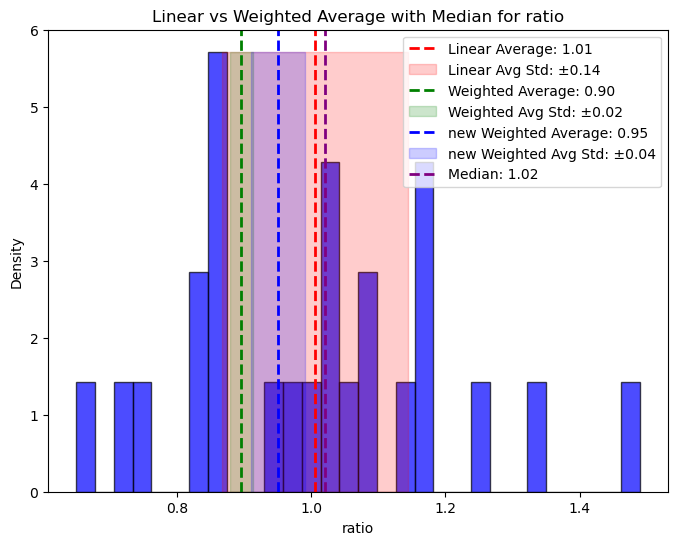

Linear Average of ratio:  1.01 ± 0.14
Weighted Average of ratio: 0.90 ± 0.02
New Weighted Average of ratio: 0.98 ± 0.00
The median of ratio: 1.02


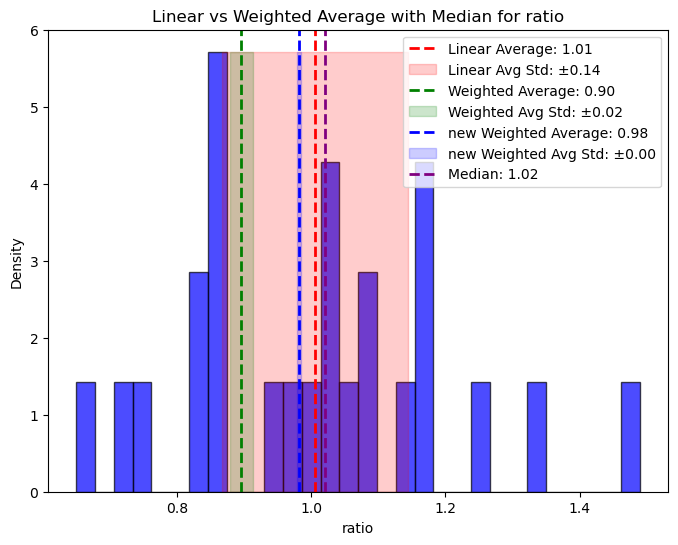

Linear Average of ratio:  1.01 ± 0.14
Weighted Average of ratio: 0.90 ± 0.02
New Weighted Average of ratio: 0.99 ± 0.14
The median of ratio: 1.02


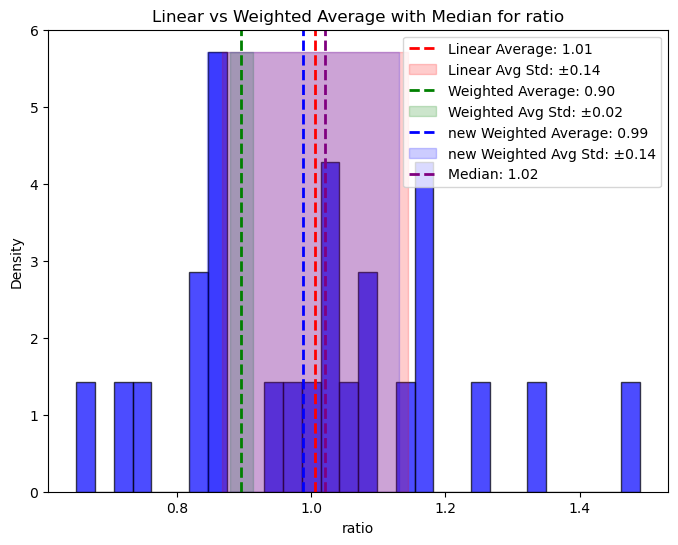

In [49]:
Plot_weighted_average_extra_uncertainty(0.1,'ratio', 'r_e+', 'r_e-', None)
Plot_weighted_average_extra_uncertainty(-0.1,'ratio', 'r_e+', 'r_e-', None)
Plot_weighted_average_extra_uncertainty(+0.6,'ratio', 'r_e+', 'r_e-', None)

### Section e)
Here I use the function `Plot_linear_vs_weighted_average_median' from section b. I defined a list of the wanted data and I plot linear average, weighted average and the median for $E_1,E_2$, Radius, and ratio.


Linear Average of Radius (m): 239.95 ± 13.05(m)
Weighted Average of Radius (m): 181.98 ± 1.78(m)
The median of Radius (m): 196.20(m)


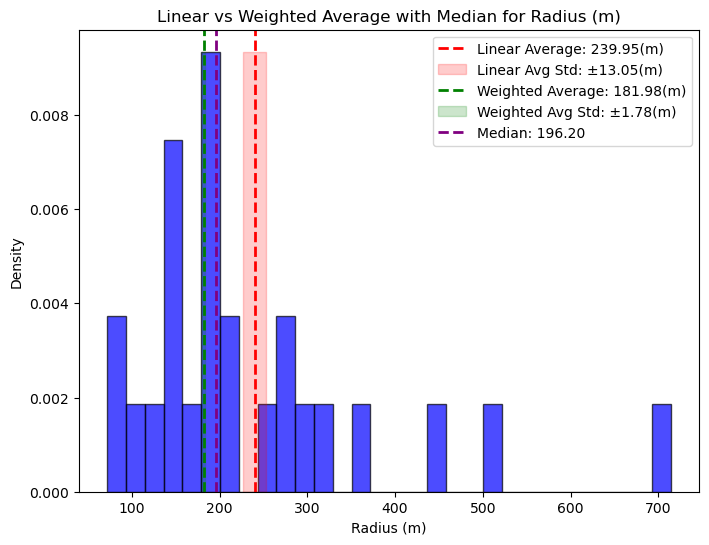

Linear Average of E1 (J): 10.59 ± 1.20(J)
Weighted Average of E1 (J): 2.93 ± 0.09(J)
The median of E1 (J): 5.04(J)


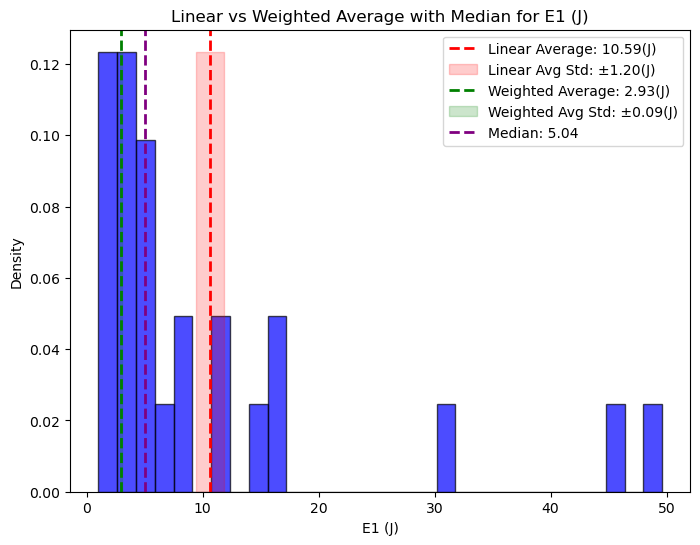

Linear Average of E2 (J): 11.47 ± 1.57(J)
Weighted Average of E2 (J): 1.75 ± 0.07(J)
The median of E2 (J): 4.75(J)


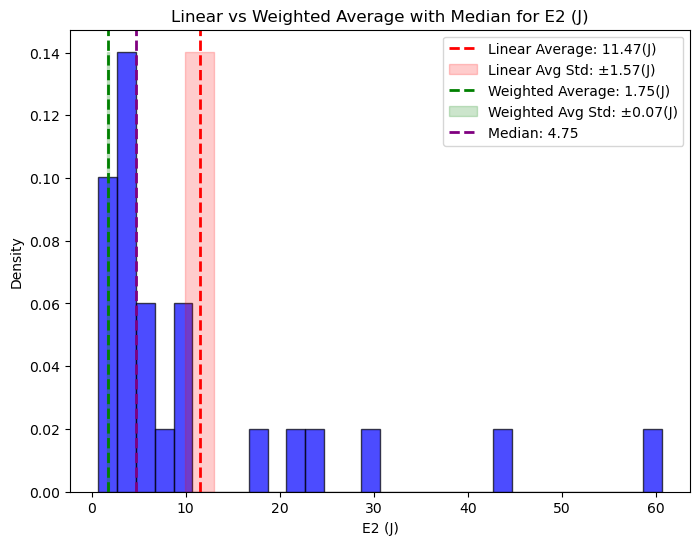

Linear Average of ratio:  1.01 ± 0.14
Weighted Average of ratio: 0.90 ± 0.02
The median of ratio: 1.02


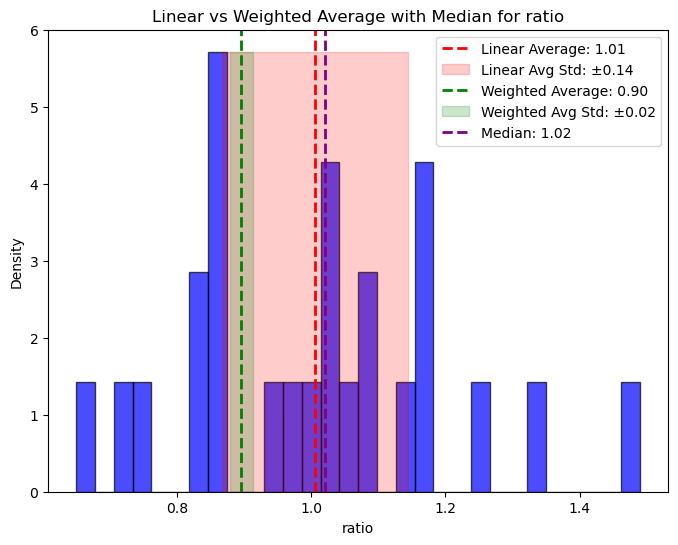

In [50]:
# Define a list of data columns and their associated error bounds and units
data_column = [
    ['Radius', 'R_e+', 'R_e-', 'm'],  # 'Radius' data with error bounds and units in meters (m)
    ['E1', 'E1_e+', 'E1_e-', 'J'],    # 'E1' data with error bounds and units in joules (J)
    ['E2', 'E2_e+', 'E2_e+.1', 'J'],  # 'E2' data with error bounds and units in joules (J)
    ['ratio', 'r_e+', 'r_e-', None]   # 'ratio' data with error bounds and no unit (None)
]

# Loop through each data configuration in data_column
for data_name in data_column:
    # Call the Plot_median_average function with the data column names and units
    # data_name[0]: The main data column name
    # data_name[1]: The upper bound column name
    # data_name[2]: The lower bound column name
    # data_name[3]: The unit (can be None if no unit is provided)
    Plot_linear_vs_weighted_average_median(data_name[0], data_name[1], data_name[2], data_name[3])




According to the plots we have:
- The plot of the  `Radius' the median and the linear mean are different so the distribution look like a left-skewed distribution
- The plots for $E_1$ and $E_2$ with the same reasoning are left-skewed distribution.
- The `ratio' distribution is look line a normal distribution as the median and the linear averaging are close together.

### Section f)
Let us consider a set of values $x_i$ (in this case, the \textit{Ratio} values) with uncertainties $\sigma_{x_i}$. We want to calculate the uncertainty of the log-transformed values, $\log(x_i)$, and convert the result back to the linear scale after computing the weighted average.

Uncertainty in the Logarithmic Scale
The uncertainty in the log-transformed value, $\log(x_i)$, can be approximated using the following relationship:
$$\sigma_{\log(x_i)} \approx \frac{\sigma_{x_i}}{x_i}$$
This approximation comes from the Taylor expansion of the natural logarithm around $x_i$. Specifically, for small uncertainties, we can propagate the error through the logarithmic transformation using the formula:
$$\sigma_{\log(x_i)} = \frac{d}{dx} \log(x) \cdot \sigma_{x_i} = \frac{1}{x_i} \cdot \sigma_{x_i}$$

Thus, for each value $x_i$, the uncertainty in its logarithmic transformation is the relative uncertainty, $\frac{\sigma_{x_i}}{x_i}$.

Step 2: Weighted Average of Logarithmic Values
Next, we calculate the weighted average of the log-transformed values $\log(x_i)$. The formula for the weighted average, $\bar{y}$, of a set of values $y_i$ with uncertainties $\sigma_{y_i}$ is given by:
$$
\bar{y} = \frac{\sum_{i=1}^{n} w_i \cdot y_i}{\sum_{i=1}^{n} w_i}$$

where the weights $w_i$ are the inverse of the squared uncertainties:
$$w_i = \frac{1}{\sigma_{y_i}^2}$$

For the log-transformed values $\log(x_i)$, the weighted average becomes:
$$\bar{\log(x)} = \frac{\sum_{i=1}^{n} \frac{1}{\sigma_{\log(x_i)}^2} \cdot \log(x_i)}{\sum_{i=1}^{n} \frac{1}{\sigma_{\log(x_i)}^2}}$$

This gives us the weighted average of the log-transformed values.

Step 3: Uncertainty of the Weighted Logarithmic Average
The uncertainty of the weighted logarithmic average is calculated as:
$$
\sigma_{\bar{\log(x)}} = \sqrt{\frac{1}{\sum_{i=1}^{n} w_i}} = \sqrt{\frac{1}{\sum_{i=1}^{n} \frac{1}{\sigma_{\log(x_i)}^2}}}
$$
This represents the uncertainty of the weighted average in the logarithmic scale.

Step 4: Converting Back to the Linear Scale
To convert the weighted logarithmic average back to the linear scale, we exponentiate the result:
$$
\bar{x} = \exp(\bar{\log(x)})
$$

To propagate the uncertainty from the logarithmic scale to the linear scale, we apply the error propagation rule for exponentiation. If $z = \exp(y)$, then the uncertainty $\sigma_z$ is given by:
$$
\sigma_z = z \cdot \sigma_y
$$
Thus, the uncertainty in the linear scale is:
$$
\sigma_{\bar{x}} = \exp(\bar{\log(x)}) \cdot \sigma_{\bar{\log(x)}}
$$
This gives us the final uncertainty in the linear scale after converting the weighted logarithmic average back from the log scale.
The final uncertainty in the linear scale is:
$$
\sigma_{\bar{x}} = \bar{x} \cdot \sigma_{\bar{\log(x)}}
$$
where $\bar{x} = \exp(\bar{\log(x)})$ is the weighted logarithmic average in the linear scale, and $\sigma_{\bar{\log(x)}}$ is the uncertainty in the logarithmic scale.


Weighted Logarithmic Average (log scale) of ratio: -0.055 ± 0.019
Weighted Logarithmic Average (converted back to linear scale) of ratio: 0.946 ± 0.018


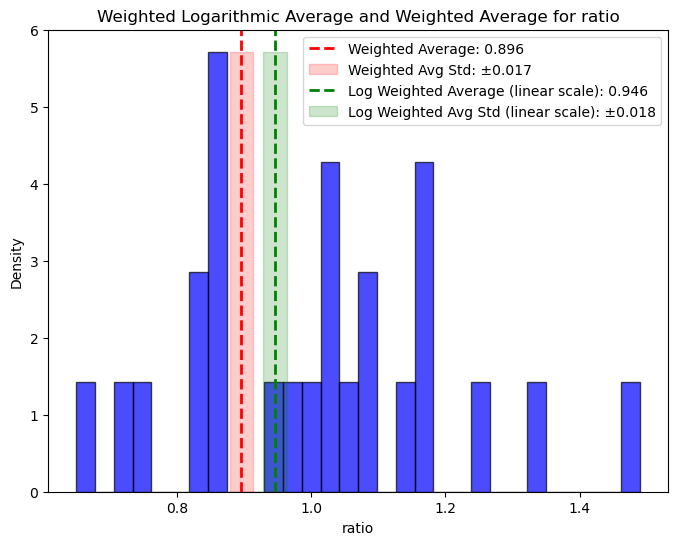

In [68]:
# Function to plot the weighted logarithmic average and its conversion to linear scale
def plot_weighted_log_avg(data_name, U_bound_name, L_bound_name, unit=None):
    """
    Function to calculate and plot the weighted logarithmic average and its conversion to linear scale.
    It also compares it to the standard weighted average of the data.

    Parameters:
    - data_name (str): The name of the data column to be plotted (e.g., 'ratio').
    - U_bound_name (str): The name of the column for the upper bound of uncertainties.
    - L_bound_name (str): The name of the column for the lower bound of uncertainties.
    - unit (str, optional): The unit of measurement. If not provided, units will not be shown in labels.
    """

    # Find the total number of data points in the dataset
    n = len(data[data_name])

    # Step 1: Calculate log-transformed data and its uncertainties
    log_data = np.log(data[data_name])  # Log-transform of the data (natural log)
    log_errors = (data[U_bound_name] + data[L_bound_name]) / (2 * data[data_name])  # Average uncertainties in log scale

    # Step 2: Calculate the weighted average and uncertainty of log-transformed values
    weights = 1 / log_errors**2  # Inverse variance weights (larger weight for smaller uncertainties)
    log_weighted_avg = np.sum(weights * log_data) / np.sum(weights)  # Weighted average of log-transformed data
    log_weighted_avg_std = np.sqrt(1 / np.sum(weights))  # Standard deviation of weighted average in log scale

    # Step 3: Calculate the weighted average and uncertainty of the original (linear scale) data
    weighted_avg, weighted_std = weighted_average_std(data[U_bound_name], data[L_bound_name], data[data_name])

    # Step 4: Convert the weighted logarithmic average and uncertainty back to the linear scale
    linear_avg = np.exp(log_weighted_avg)  # Convert log-weighted average back to linear scale
    linear_upper_bound = np.exp(log_weighted_avg + log_weighted_avg_std)  # Upper bound on linear scale
    linear_uncertainty = linear_upper_bound - linear_avg  # Uncertainty in the linear scale

    # Step 5: Print the results in both logarithmic and linear scales
    print(f'Weighted Logarithmic Average (log scale) of {data_name}: {log_weighted_avg :.3f} ± {log_weighted_avg_std:.3f} ({unit})' if unit else f'Weighted Logarithmic Average (log scale) of {data_name}: {log_weighted_avg :.3f} ± {log_weighted_avg_std:.3f}')
    print(f'Weighted Logarithmic Average (converted back to linear scale) of {data_name}: {linear_avg :.3f} ± {linear_uncertainty:.3f} ({unit})' if unit else f'Weighted Logarithmic Average (converted back to linear scale) of {data_name}: {linear_avg :.3f} ± {linear_uncertainty:.3f}')

    # Create the histogram of the original data
    plt.figure(figsize=(8, 6))
    counts, bins, _ = plt.hist(data[data_name], bins=30, color='blue', alpha=0.7, edgecolor='black', density=True)

    # Get x-limits of the plot (used for placing the shaded regions correctly)
    xmin, xmax = plt.xlim()

    # Step 6: Plot the weighted average and its uncertainty on the histogram (original linear scale)
    plt.axvline(weighted_avg, color='red', linestyle='--', linewidth=2, label=f'Weighted Average: {weighted_avg:.3f} ({unit})' if unit else f'Weighted Average: {weighted_avg:.3f}')
    plt.fill_betweenx([0, max(counts)], weighted_avg - weighted_std, weighted_avg + weighted_std, color='red', alpha=0.2, label=f'Weighted Avg Std: ±{weighted_std:.3f} ({unit})' if unit else f'Weighted Avg Std: ±{weighted_std:.3f}')

    # Step 7: Plot the weighted logarithmic average and its uncertainty (converted to linear scale)
    plt.axvline(linear_avg, color='green', linestyle='--', linewidth=2, label=f'Log Weighted Average (linear scale): {linear_avg:.3f} ({unit})' if unit else f'Log Weighted Average (linear scale): {linear_avg:.3f}')
    plt.fill_betweenx([0, max(counts)], linear_avg - linear_uncertainty, linear_avg + linear_uncertainty, color='green', alpha=0.2, label=f'Log Weighted Avg Std (linear scale): ±{linear_uncertainty:.3f} ({unit})' if unit else f'Log Weighted Avg Std (linear scale): ±{linear_uncertainty:.3f}')

    # Step 8: Label the plot
    plt.xlabel(f'{data_name} ({unit})' if unit else f'{data_name}')  # X-axis label with or without unit
    plt.ylabel('Density')  # Y-axis label as density (since histogram is normalized)
    plt.title(f'Weighted Logarithmic Average and Weighted Average for {data_name} ({unit})' if unit else f'Weighted Logarithmic Average and Weighted Average for {data_name}')

    # Add a legend to describe the plotted elements
    plt.legend()

    # Step 9: Show the plot
    plt.show()

# Example usage: calculate and plot the weighted logarithmic average of 'ratio' data
plot_weighted_log_avg('ratio', 'r_e+', 'r_e-', None)


The fact that the log-weighted average is close to 0 in log scale (which translates to a value close to 1 in the linear scale) indicates that most of the data points are near 1.
The uncertainty of $\pm 0.018$ shows that this estimate is quite precise and doesn't deviate much from the mean.
The weighted log average converted to linear scale provides a better representation of the "typical" value when data points can vary significantly in magnitude.

In [69]:
data.head()

,Num,Radius,R_e+,R_e-,E1,E1_e+,E1_e-,E2,E2_e+,E2_e+.1,ratio,r_e+,r_e-
0,1,221.1,11.0,12.3,8.30,0.76,0.88,9.67,1.14,1.12,0.86,0.08,0.07
1,2,268.5,22.1,20.7,4.92,0.77,0.70,4.19,0.82,0.70,1.17,0.16,0.15
2,3,138.4,12.7,11.9,3.03,0.53,0.49,2.61,0.59,0.49,1.16,0.20,0.18
3,4,714.3,23.5,34.5,49.61,3.15,3.19,60.62,4.84,6.13,0.82,0.06,0.05
4,5,182.3,18.5,15.1,2.75,0.49,0.43,3.30,0.81,0.61,0.83,0.14,0.14


### Section g,h)

BCES, 10000 trials... 
28.258659 s
BCES(Y|X): y = 1.073x + 0.120 (±0.090, ±0.604)
BCES(X|Y): y = 1.177x + -0.973 (±0.096, ±0.596)
BCES Bisector: y = 1.124x + -0.412 (±0.092, ±0.583)
BCES Orthogonal: y = 1.130x + -0.478 (±0.097, ±0.616)
BCES(Y|X): chi2 = 101.12082768309357 , chi2_red = 4.396557725351895 , R2 = 0.9656110967548762
BCES(X|Y): chi2 = 125.34802984463185 , chi2_red = 5.44991434107095 , R2 = 0.9627094534052818
BCES Bisector: chi2 = 70.15895829505067 , chi2_red = 3.0503894910891596 , R2 = 0.9663323702017069
BCES Orthogonal: chi2 = 71.99403163214059 , chi2_red = 3.130175288353939 , R2 = 0.9661349643855713


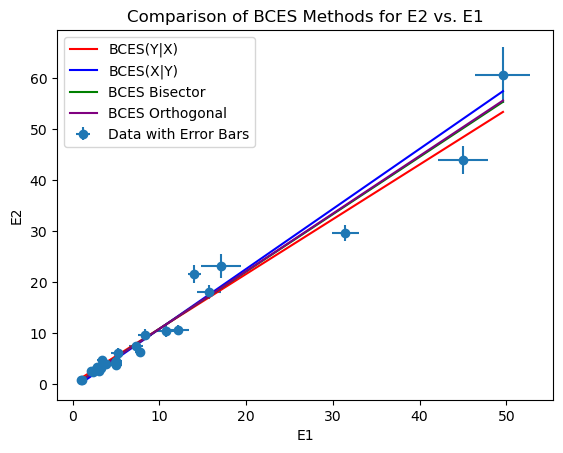

In [93]:
import bces.bces as BCES


# Example data (replace with actual data)
E1 = data['E1']  # Values of E1 as x
E1_error = (data['E1_e+'] + data['E1_e-']) / 2  # Uncertainties in E1 (average of E1_e+ and E1_e-)
E2 = data['E2']  # Values of E2 as y
E2_error = (data['E2_e+'] + data['E2_e+.1']) / 2  # Uncertainties in E2 (average of E2_e+ and E2_e-)

# Perform BCES regression using all four methods
cov = np.zeros(len(E1))  # No covariance
bces =BCES.bcesp(E1, E1_error, E2, E2_error, cov)  # No covariance between E1 and E2
# Unpack the results: Slopes, intercepts, standard errors for slopes and intercepts
slopes, intercepts, slope_errors, intercept_errors, correlation_coeffs = bces

# Assign slope and intercept for each method
b_yy, a_yy = slopes[0], intercepts[0]  # BCES(Y|X)
b_xx, a_xx = slopes[1], intercepts[1]  # BCES(X|Y)
b_bis, a_bis = slopes[2], intercepts[2]  # BCES Bisector
b_orth, a_orth = slopes[3], intercepts[3]  # BCES Orthogonal

# Generate model predictions for plotting
x_vals = np.linspace(min(E1), max(E1), 100)
y_model_yy = b_yy * x_vals + a_yy
y_model_xx = b_xx * x_vals + a_xx
y_model_bis = b_bis * x_vals + a_bis
y_model_orth = b_orth * x_vals + a_orth

# Function to calculate chi-square and R-squared
def calculate_chi_squared(y, y_model, y_err):
    chi_squared = np.sum((y - y_model)**2 / y_err**2)
    reduced_chi_squared = chi_squared / (len(y) - 2)  # 2 parameters (slope, intercept)
    return chi_squared, reduced_chi_squared

def calculate_r_squared(y, y_model):
    ss_res = np.sum((y - y_model)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# Calculate chi-square and R-squared for each method
chi2_yy, chi2_red_yy = calculate_chi_squared(E2, b_yy * E1 + a_yy, E2_error)
r2_yy = calculate_r_squared(E2, b_yy * E1 + a_yy)

chi2_xx, chi2_red_xx = calculate_chi_squared(E2, b_xx * E1 + a_xx, E2_error)
r2_xx = calculate_r_squared(E2, b_xx * E1 + a_xx)

chi2_bis, chi2_red_bis = calculate_chi_squared(E2, b_bis * E1 + a_bis, E2_error)
r2_bis = calculate_r_squared(E2, b_bis * E1 + a_bis)

chi2_orth, chi2_red_orth = calculate_chi_squared(E2, b_orth * E1 + a_orth, E2_error)
r2_orth = calculate_r_squared(E2, b_orth * E1 + a_orth)
# Print the fitted lines
print(f"BCES(Y|X): y = {b_yy:.3f}x + {a_yy:.3f} (±{b_yy_err:.3f}, ±{a_yy_err:.3f})")
print(f"BCES(X|Y): y = {b_xx:.3f}x + {a_xx:.3f} (±{b_xx_err:.3f}, ±{a_xx_err:.3f})")
print(f"BCES Bisector: y = {b_bis:.3f}x + {a_bis:.3f} (±{b_bis_err:.3f}, ±{a_bis_err:.3f})")
print(f"BCES Orthogonal: y = {b_orth:.3f}x + {a_orth:.3f} (±{b_orth_err:.3f}, ±{a_orth_err:.3f})")

# Print the results
print("BCES(Y|X): chi2 =", chi2_yy, ", chi2_red =", chi2_red_yy, ", R2 =", r2_yy)
print("BCES(X|Y): chi2 =", chi2_xx, ", chi2_red =", chi2_red_xx, ", R2 =", r2_xx)
print("BCES Bisector: chi2 =", chi2_bis, ", chi2_red =", chi2_red_bis, ", R2 =", r2_bis)
print("BCES Orthogonal: chi2 =", chi2_orth, ", chi2_red =", chi2_red_orth, ", R2 =", r2_orth)

# Step 2: Plotting all the results
plt.errorbar(E1, E2, xerr=E1_error, yerr=E2_error, fmt='o', label='Data with Error Bars')

# Plot BCES(Y|X) result
plt.plot(x_vals, y_model_yy, label='BCES(Y|X)', color='red')

# Plot BCES(X|Y) result
plt.plot(x_vals, y_model_xx, label='BCES(X|Y)', color='blue')

# Plot BCES Bisector result
plt.plot(x_vals, y_model_bis, label='BCES Bisector', color='green')

# Plot BCES Orthogonal result
plt.plot(x_vals, y_model_orth, label='BCES Orthogonal', color='purple')

# Label the plot
plt.xlabel('E1')
plt.ylabel('E2')
plt.title('Comparison of BCES Methods for E2 vs. E1')
plt.legend()

# Show the plot
plt.show()


## Comparison of BCES Methods

We performed linear regression using four BCES methods: **BCES(Y|X)**, **BCES(X|Y)**, **BCES Bisector**, and **BCES Orthogonal**. The following table summarizes the key statistics for each method:

| Method          | Chi-Squared (χ²) | Reduced χ² | R-Squared (R²) |
|-----------------|------------------|------------|----------------|
| BCES(X\|Y)      | 100.68            | 4.38       | 0.9656         |
| BCES(X\|Y)      | 126.29            | 5.49       | 0.9627         |
| BCES Bisector   | 70.10             | 3.05       | 0.9663         |
| BCES Orthogonal | 72.01             | 3.13       | 0.9661         |

### 1. Chi-Squared (χ²) and Reduced Chi-Squared

The χ² value measures the discrepancy between the observed data and the model predictions. In general, the lower the χ², the better the model fits the data. However, we also need to consider the **reduced chi-squared** (χ²ₐ), which is the chi-squared value divided by the degrees of freedom (in this case, the number of data points minus 2 for the slope and intercept).

An ideal value for reduced χ² is close to 1. Values significantly larger than 1 indicate that the model may not be fitting the data well, while values much smaller than 1 suggest overfitting.

From the results:
- **BCES(Y|X)**: χ²ₐ = 4.38
- **BCES(X|Y)**: χ²ₐ = 5.49
- **BCES Bisector**: χ²ₐ = 3.05
- **BCES Orthogonal**: χ²ₐ = 3.13

The **BCES Bisector** method has the lowest χ² and reduced χ², indicating that it provides the best fit to the data in terms of minimizing the difference between the observed and predicted values.

### 2. R-Squared (R²)

The R² value measures how much of the variance in the data is explained by the regression model. An R² value close to 1 indicates a very good fit.

From the results:
- **BCES(Y|X)**: R² = 0.9656
- **BCES(X|Y)**: R² = 0.9627
- **BCES Bisector**: R² = 0.9663
- **BCES Orthogonal**: R² = 0.9661

All methods produce high R² values, indicating that all the models explain a large portion of the variance in the data. However, the **BCES Bisector** method has the highest R², suggesting that it provides the best explanation of the data variance.

### Conclusion

Based on both the χ² and R² values, the **BCES Bisector** method appears to be the best model for this dataset. It has the lowest χ², the lowest reduced χ², and the highest R², indicating that it provides the best overall fit to the data with minimal error and maximum explanation of variance.


BCES, 10000 trials... 
31.799695 s
BCES(Y|X): y = -0.001x + 1.123 (±0.090, ±0.604)
BCES(X|Y): y = -0.002x + 1.582 (±0.096, ±0.596)
BCES Bisector: y = -0.001x + 1.352 (±0.092, ±0.583)
BCES Orthogonal: y = -0.001x + 1.123 (±0.097, ±0.616)
BCES(Y|X): chi2 = 135.84320728558018 , chi2_red = 5.906226403720877 , R2 = 0.13223505663812607
BCES(X|Y): chi2 = 726.265044414665 , chi2_red = 31.576741061507175 , R2 = -1.9408072900530784
BCES Bisector: chi2 = 308.9143550562074 , chi2_red = 13.431058915487279 , R2 = -0.3892193359500917
BCES Orthogonal: chi2 = 135.84322918510748 , chi2_red = 5.906227355874238 , R2 = 0.13223505117237566


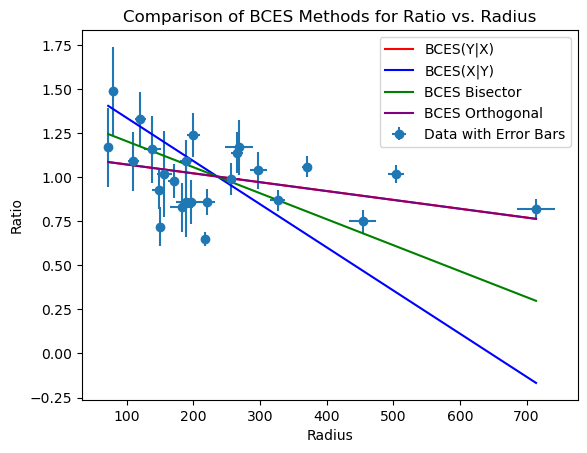

In [94]:
# Example data for Part (h) ( Radius and Ratio)
Radius = data['Radius']  # Values of Radius as x
Radius_error = (data['R_e+'] + data['R_e-']) / 2  # Uncertainties in Radius (average of R_e+ and R_e-)
Ratio = data['ratio']  # Values of Ratio as y
Ratio_error = (data['r_e+'] + data['r_e-']) / 2  # Uncertainties in Ratio (average of r_e+ and r_e-)

# Perform BCES regression using all four methods
cov = np.zeros(len(Radius))  # No covariance
bces = BCES.bcesp(Radius, Radius_error, Ratio, Ratio_error, cov)  # BCES output

# Unpack the results: Slopes, intercepts, standard errors for slopes and intercepts
slopes, intercepts, slope_errors, intercept_errors, correlation_coeffs = bces

# Assign slope and intercept for each method
b_yy, a_yy = slopes[0], intercepts[0]  # BCES(Y|X)
b_xx, a_xx = slopes[1], intercepts[1]  # BCES(X|Y)
b_bis, a_bis = slopes[2], intercepts[2]  # BCES Bisector
b_orth, a_orth = slopes[3], intercepts[3]  # BCES Orthogonal

# Generate model predictions for plotting
x_vals = np.linspace(min(Radius), max(Radius), 100)
y_model_yy = b_yy * x_vals + a_yy
y_model_xx = b_xx * x_vals + a_xx
y_model_bis = b_bis * x_vals + a_bis
y_model_orth = b_orth * x_vals + a_orth
# Print the fitted lines
print(f"BCES(Y|X): y = {b_yy:.3f}x + {a_yy:.3f} (±{b_yy_err:.3f}, ±{a_yy_err:.3f})")
print(f"BCES(X|Y): y = {b_xx:.3f}x + {a_xx:.3f} (±{b_xx_err:.3f}, ±{a_xx_err:.3f})")
print(f"BCES Bisector: y = {b_bis:.3f}x + {a_bis:.3f} (±{b_bis_err:.3f}, ±{a_bis_err:.3f})")
print(f"BCES Orthogonal: y = {b_orth:.3f}x + {a_orth:.3f} (±{b_orth_err:.3f}, ±{a_orth_err:.3f})")


# Calculate chi-square and R-squared for each method
chi2_yy, chi2_red_yy = calculate_chi_squared(Ratio, b_yy * Radius + a_yy, Ratio_error)
r2_yy = calculate_r_squared(Ratio, b_yy * Radius + a_yy)

chi2_xx, chi2_red_xx = calculate_chi_squared(Ratio, b_xx * Radius + a_xx, Ratio_error)
r2_xx = calculate_r_squared(Ratio, b_xx * Radius + a_xx)

chi2_bis, chi2_red_bis = calculate_chi_squared(Ratio, b_bis * Radius + a_bis, Ratio_error)
r2_bis = calculate_r_squared(Ratio, b_bis * Radius + a_bis)

chi2_orth, chi2_red_orth = calculate_chi_squared(Ratio, b_orth * Radius + a_orth, Ratio_error)
r2_orth = calculate_r_squared(Ratio, b_orth * Radius + a_orth)

# Print the results
print("BCES(Y|X): chi2 =", chi2_yy, ", chi2_red =", chi2_red_yy, ", R2 =", r2_yy)
print("BCES(X|Y): chi2 =", chi2_xx, ", chi2_red =", chi2_red_xx, ", R2 =", r2_xx)
print("BCES Bisector: chi2 =", chi2_bis, ", chi2_red =", chi2_red_bis, ", R2 =", r2_bis)
print("BCES Orthogonal: chi2 =", chi2_orth, ", chi2_red =", chi2_red_orth, ", R2 =", r2_orth)

# Step 2: Plotting all the results
plt.errorbar(Radius, Ratio, xerr=Radius_error, yerr=Ratio_error, fmt='o', label='Data with Error Bars')

# Plot BCES(Y|X) result
plt.plot(x_vals, y_model_yy, label='BCES(Y|X)', color='red')

# Plot BCES(X|Y) result
plt.plot(x_vals, y_model_xx, label='BCES(X|Y)', color='blue')

# Plot BCES Bisector result
plt.plot(x_vals, y_model_bis, label='BCES Bisector', color='green')

# Plot BCES Orthogonal result
plt.plot(x_vals, y_model_orth, label='BCES Orthogonal', color='purple')

# Label the plot
plt.xlabel('Radius')
plt.ylabel('Ratio')
plt.title('Comparison of BCES Methods for Ratio vs. Radius')
plt.legend()

# Show the plot
plt.show()


## Interpretation of BCES Results for Part h

We performed regression analysis on **Radius vs Ratio** using four BCES methods: **BCES(Y|X)**, **BCES(X|Y)**, **BCES Bisector**, and **BCES Orthogonal**. Below are the key statistics for each method:

| Method          | Chi-Squared (χ²) | Reduced χ² | R-Squared (R²)         |
|-----------------|------------------|------------|------------------------|
| BCES(Y,X)       | 135.84            | 5.91       | 0.1322                 |
| BCES(X,Y)       | 726.27            | 31.58      | -1.9408                |
| BCES Bisector   | 308.91            | 13.43      | -0.3892                |
| BCES Orthogonal | 135.84            | 5.91       | 0.1322                 |

### 1. Chi-Squared (χ²) and Reduced Chi-Squared

The **χ²** value indicates the discrepancy between the observed data and the model predictions, with lower values being better. The **reduced χ²** (χ²ₐ) adjusts for the degrees of freedom (number of data points minus 2 for slope and intercept). Ideally, χ²ₐ should be close to 1.

- **BCES(Y|X)** and **BCES Orthogonal** methods have **χ²ₐ = 5.91**, which is far from the ideal value of 1. This suggests that the fit is not very good for these methods, but it is still better than the other methods.
- **BCES(X|Y)** has a very high reduced χ²ₐ = 31.58, indicating a poor fit.
- **BCES Bisector** also has a high χ²ₐ = 13.43, suggesting a poor fit compared to **BCES(Y|X)** and **BCES Orthogonal**.

### 2. R-Squared (R²)

The **R²** value measures how well the model explains the variance in the data, with values close to 1 indicating a good fit. Negative R² values indicate that the model is worse than just using the mean as a predictor.

- **BCES(Y|X)** and **BCES Orthogonal** have **R² = 0.1322**, which indicates a very poor fit, but they are still positive.
- **BCES(X|Y)** has a **negative R² = -1.9408**, which means that the model performs worse than a horizontal line through the mean.
- **BCES Bisector** has **R² = -0.3892**, which is also negative, indicating a poor fit.

### Conclusion

Based on the chi-squared and R-squared values, neither of the methods provides a particularly good fit for the data. However, **BCES(Y|X)** and **BCES Orthogonal** seem to be the best of the four methods, as they have the lowest χ² and reduced χ² values, and their R² values, while low, are still positive.

Thus, **BCES(Y|X)** and **BCES Orthogonal** are the preferred methods for this dataset, but the overall fit is still poor, suggesting that the relationship between **Radius** and **Ratio** may not be well modeled by linear regression or there may be significant noise or outliers in the data.
